<a href="https://colab.research.google.com/github/hembasnet/Bitcoin-Price-prediction/blob/main/Bitcoin_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv('/content/bitcoin.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [18]:
data.shape

(2713, 7)

In [19]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


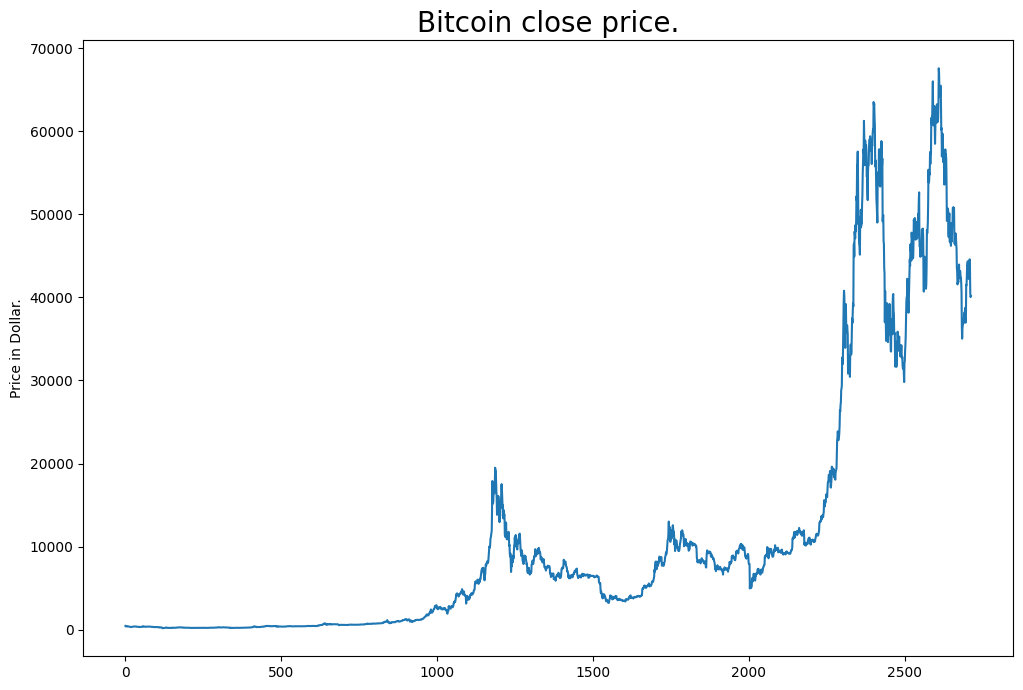

In [21]:
plt.figure(figsize=(12,8))
plt.plot(data['Close'])
plt.title('Bitcoin close price.', fontsize=20)
plt.ylabel('Price in Dollar.')
plt.show()

In [22]:
data[data['Close'] == data['Adj Close']].shape, data.shape

((2713, 7), (2713, 7))

In [23]:
data = data.drop(['Adj Close'], axis=1)

In [24]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


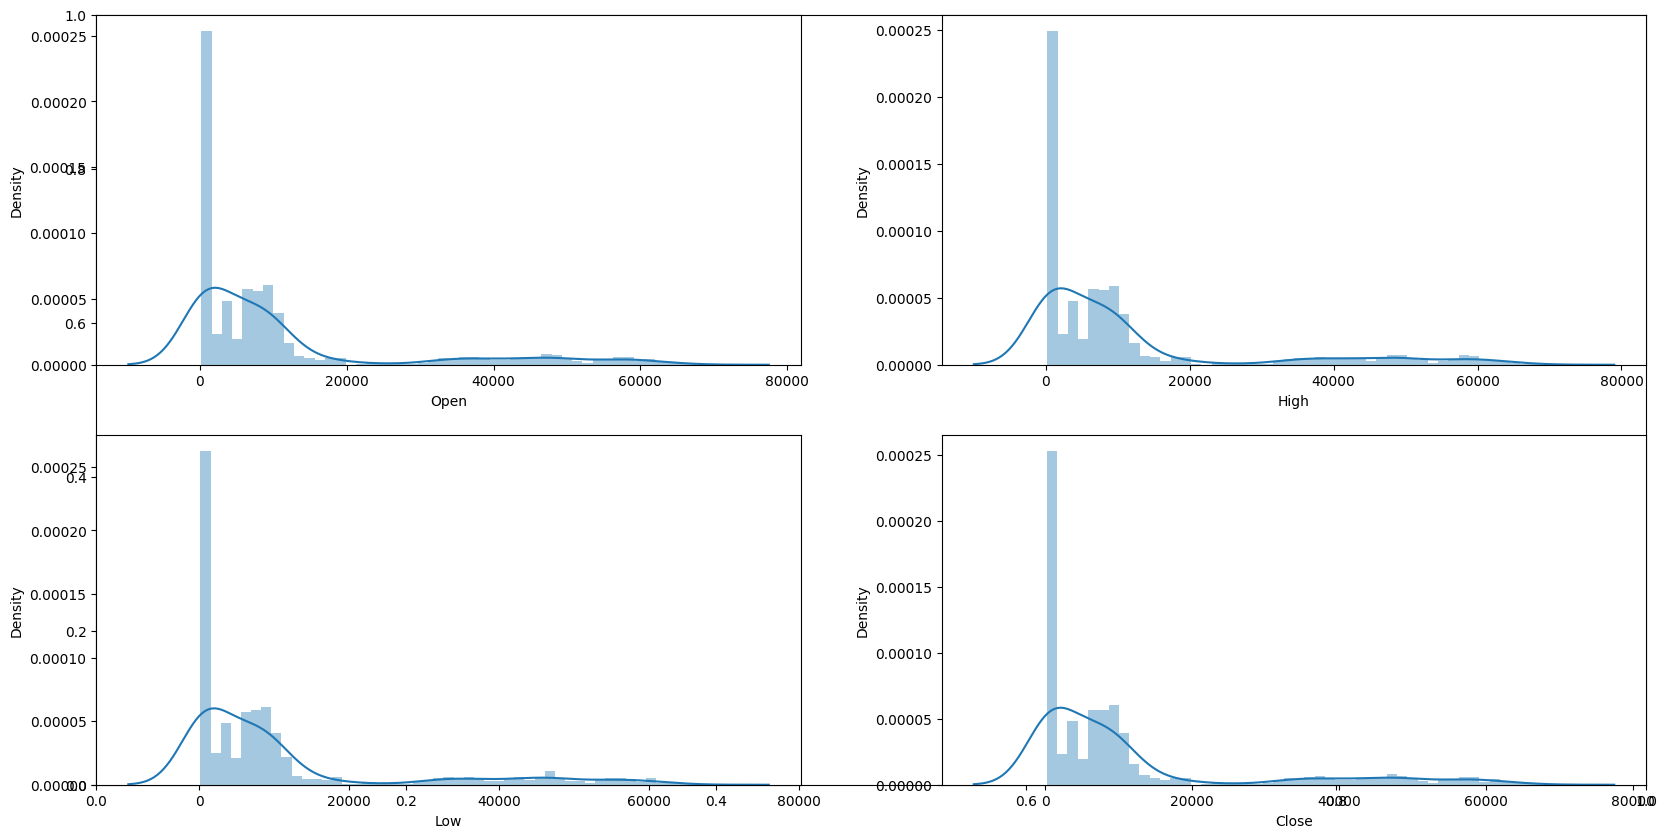

In [25]:
feature = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(feature):
  plt.subplot(2,2,i+1)
  sns.distplot(data[col])
plt.show()

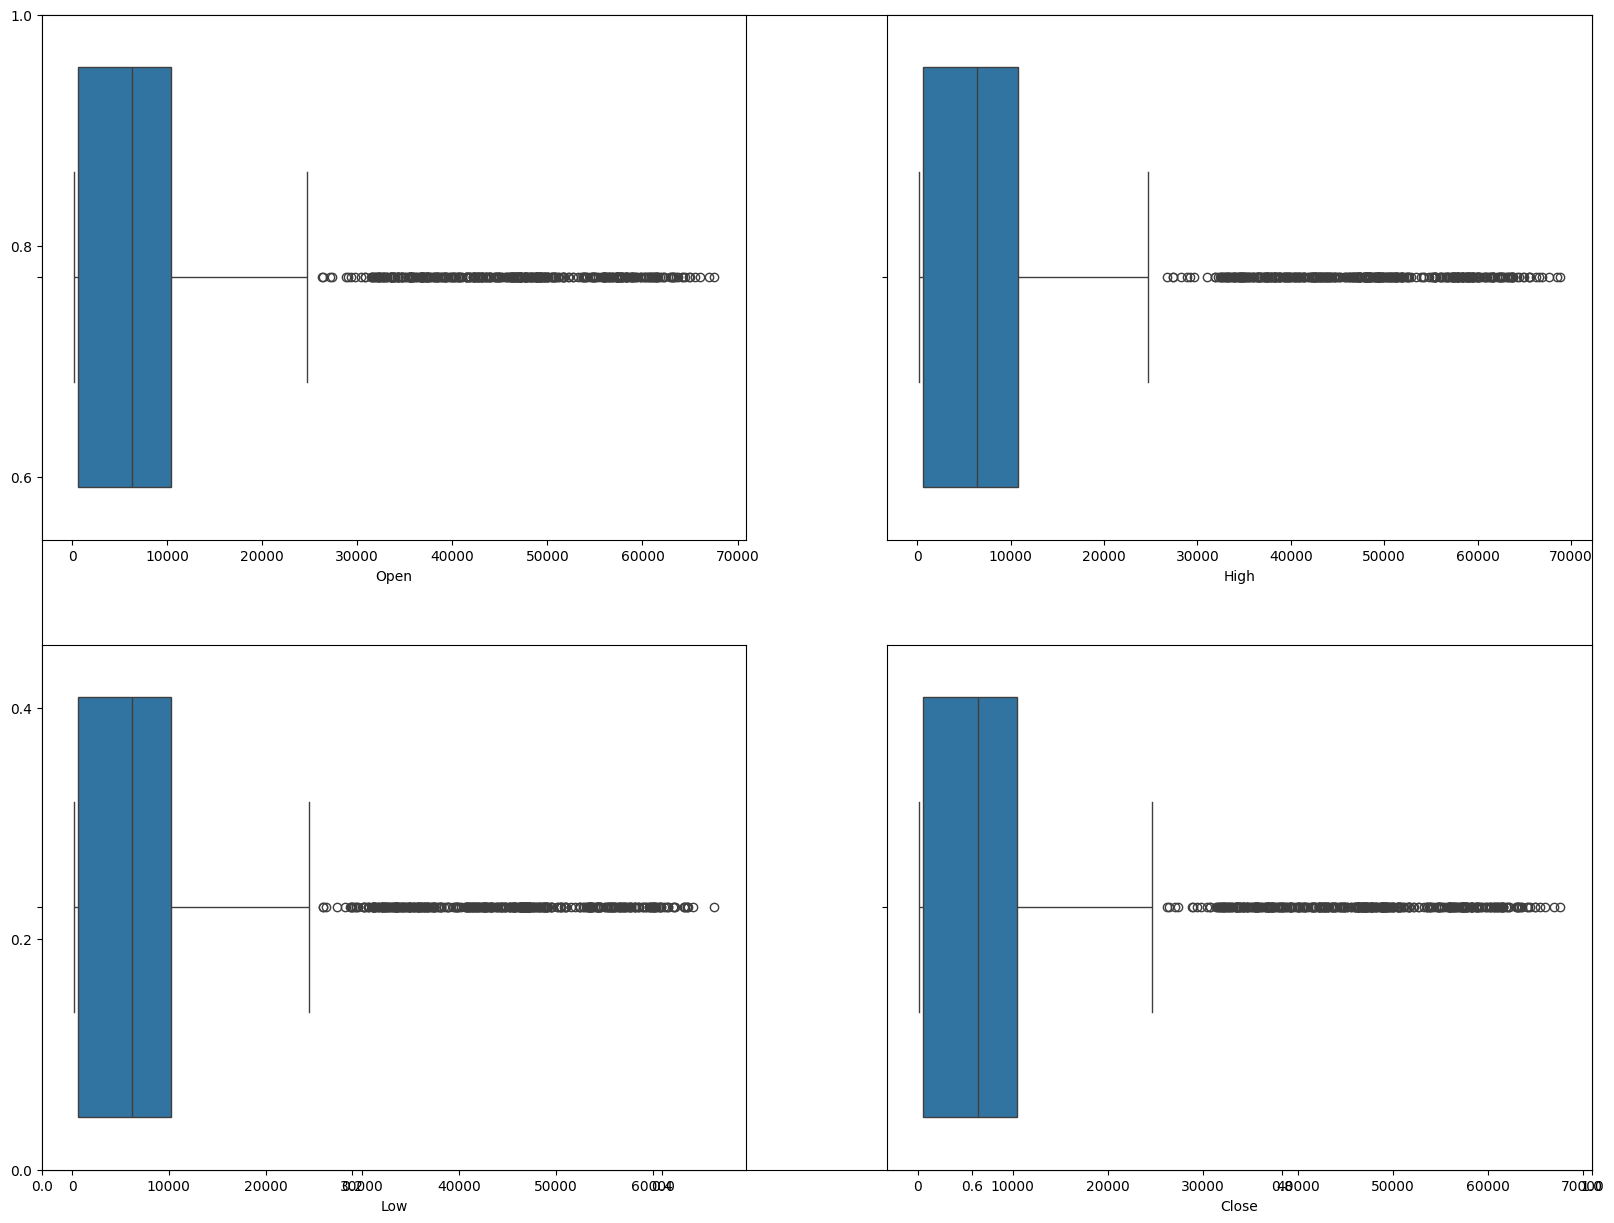

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

feature = ['Open', 'High', 'Low', 'Close']
plt.subplots(figsize=(20, 15))
for i, subplot in enumerate(feature):
  plt.subplot(2,2,i+1)
  sns.boxplot(data[subplot], orient='h')
plt.show()

In [27]:
data['Date'] = data['Date'].astype(str)
splitted = data['Date'].str.split('-', expand=True)
data['Year'] = splitted[0].astype('int')
data['Month'] = splitted[1].astype('int')
data['Day'] = splitted[2].astype('int')

data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


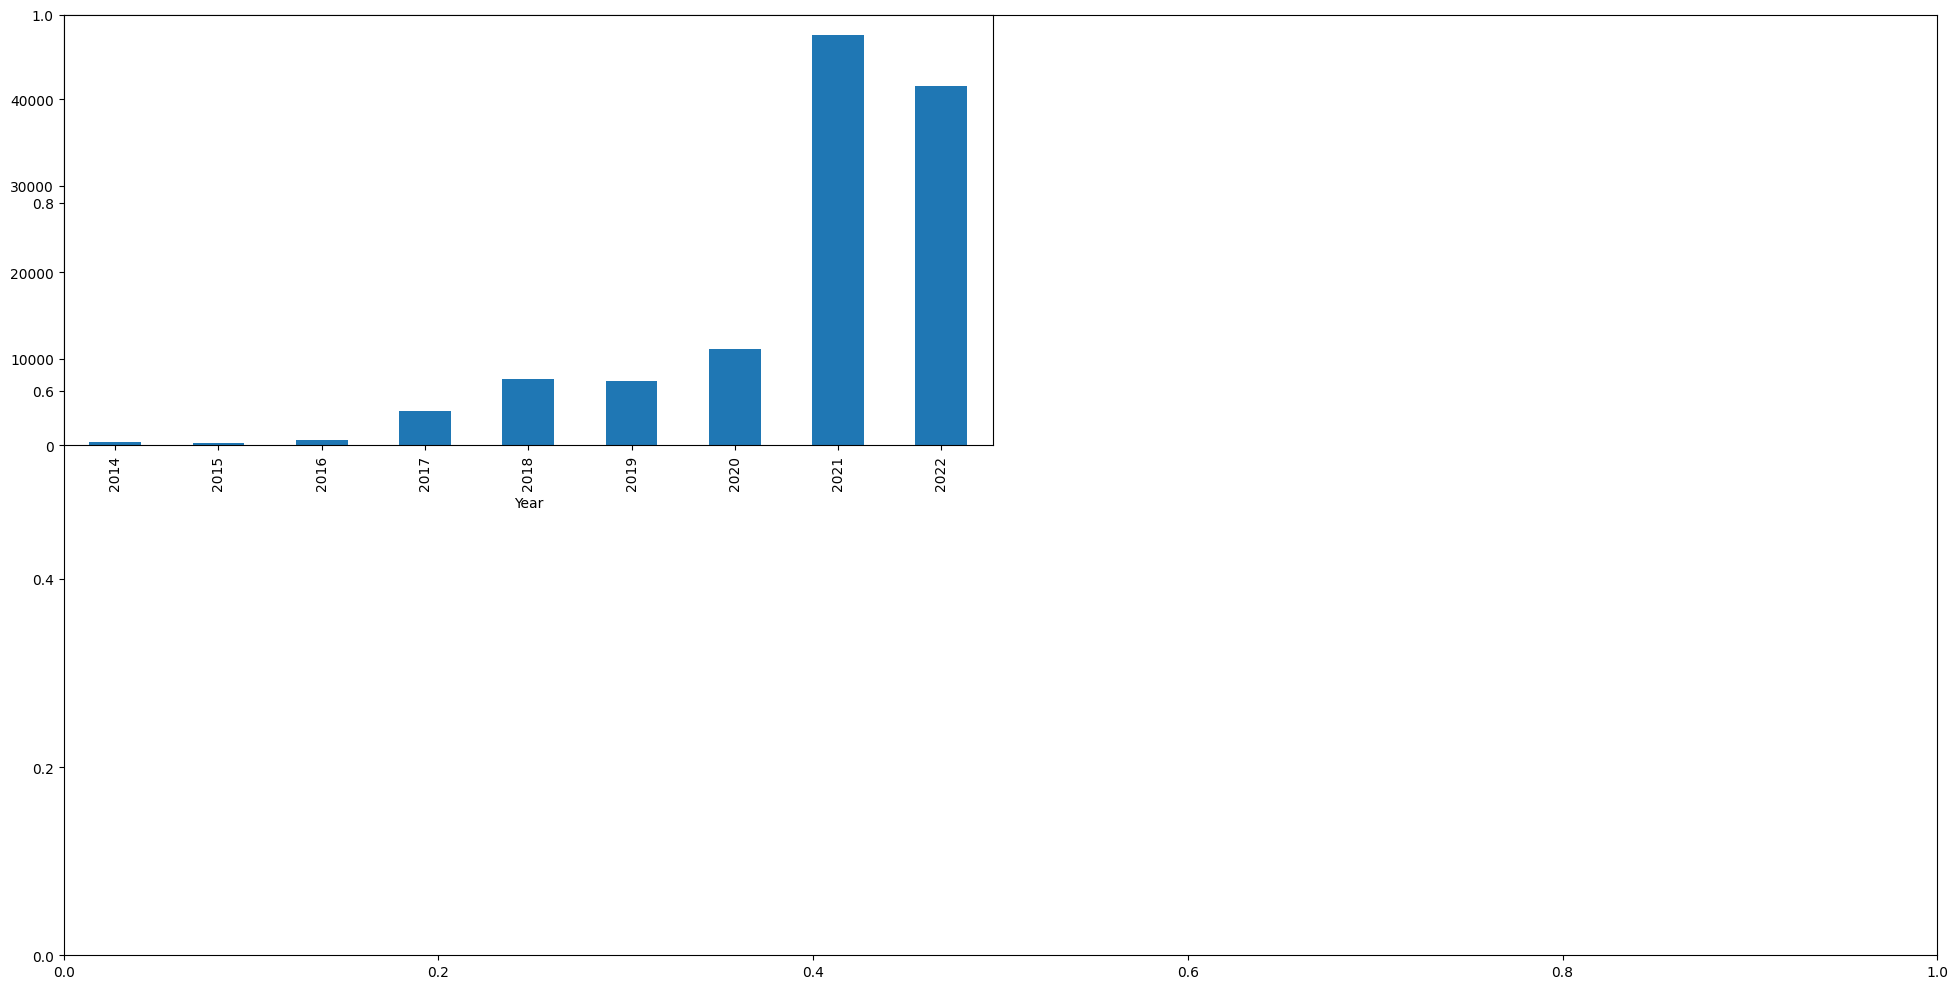

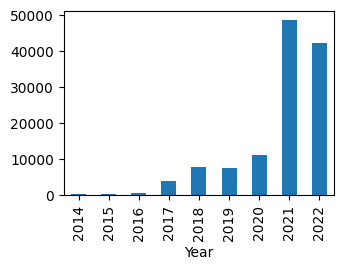

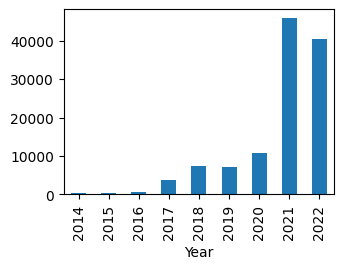

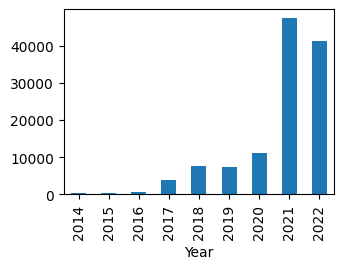

In [30]:


# Group by Year and calculate the mean
data_grouped = data.groupby('Year').mean()

plt.subplots(figsize=(20, 10))
for i, col in enumerate(['Open','High','Low','Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
  plt.tight_layout()
  plt.show()

In [29]:
data['is quarter end'] = np.where(data['Month']%3==0,1,0)
data.head()

,Date,Open,High,Low,Close,Volume,Year,Month,Day,is quarter end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


In [35]:
data['Open-Close'] = data['Open']-data['Close']
data['Hight-Low'] = data['High']-data['Low']
data['target'] =np.where(data['Close'].shift(-1)>data['Close'],1 ,0)


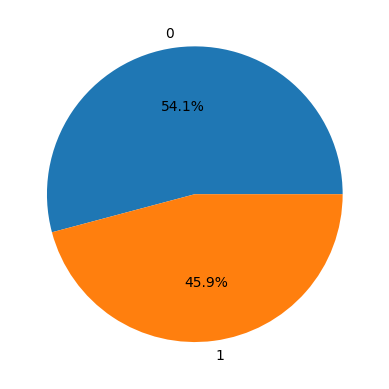

In [39]:
plt.pie(data['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

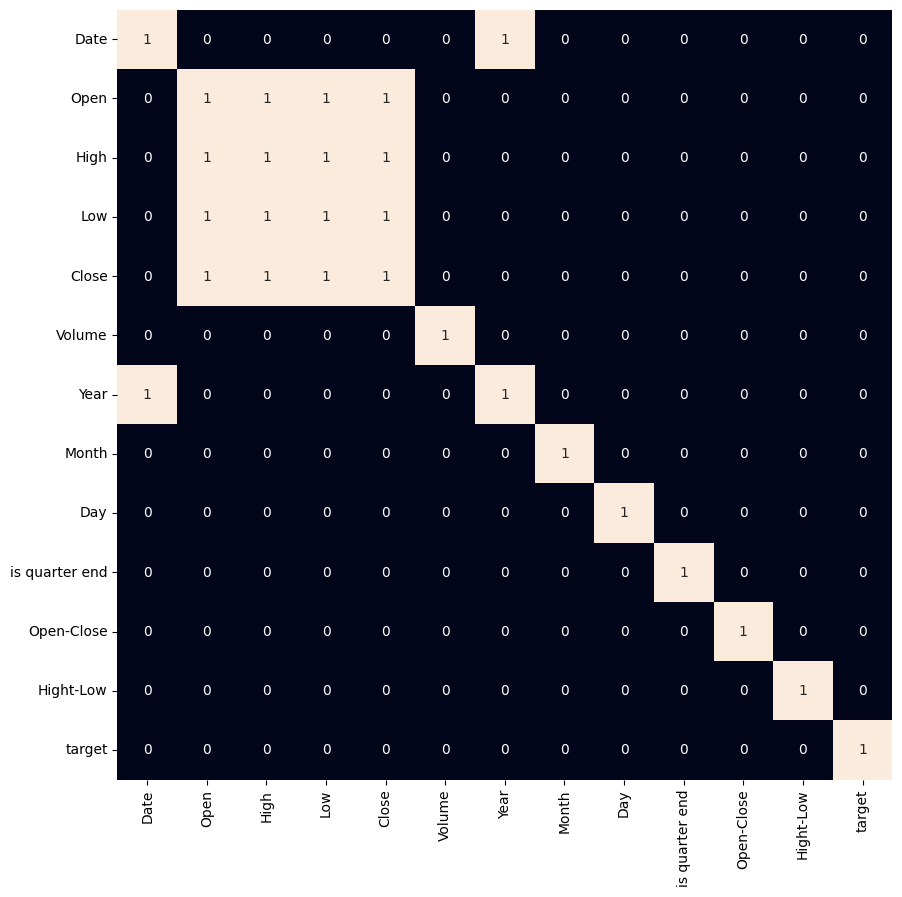

In [42]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr() >0.9, annot=True, cbar=False)
plt.show()

In [46]:


feature = (['Open-Close', 'Hight-Low', 'is quarter end' ])
target = data['target']

scaler = StandardScaler()
features = scaler.fit_transform(data[feature]) # Corrected variable name from features to feature

x_train, x_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(x_train, y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict_proba(x_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(y_valid, models[i].predict_proba(x_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5292379305190785
Validation Accuracy :  0.5021471041620789

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.46760446693570773
Validation Accuracy :  0.47027086544813923

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Trai

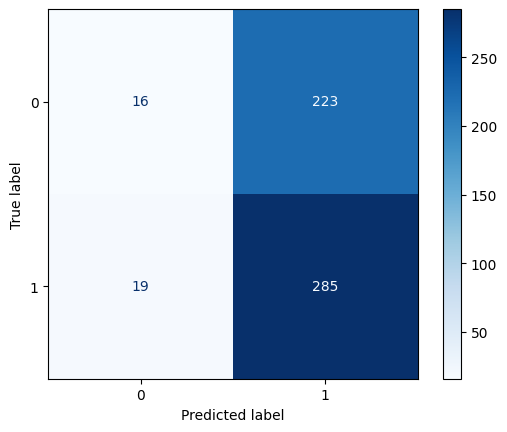

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(models[0], x_valid, y_valid, cmap='Blues')
plt.show()

**We can see that our model is working fine.**